In [113]:
from mpl_toolkits.mplot3d.axes3d import *
import matplotlib.mlab as ml
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LightSource
import pickle
import pandas as pd
import os
import seaborn as sns
sns.reset_orig()
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.misc import imread
from scipy.spatial import voronoi_plot_2d
from scipy.spatial import Voronoi
from map_overlay import MapOverlay
import utils
import figure_functions

In [2]:
curr_dir = os.getcwd()
data_path = curr_dir + '/../data/'
fig_path = curr_dir + '/../figs/'

In [3]:
params = utils.load_data(data_path)

gps_loc, avg_loads, park_data, N, P, idx_to_day_hour, day_hour_to_idx = params

time = 1

## 3D Surface Plot

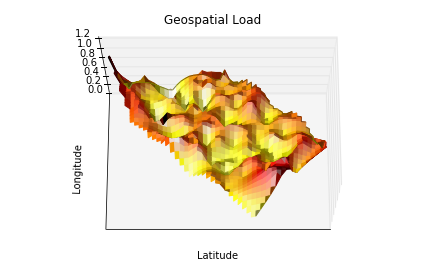

In [4]:
fig, ax = figure_functions.surface_plot(loads=avg_loads, gps_loc=gps_loc, time=4, 
                                        fig_path=fig_path)
plt.show()

## Interpolation

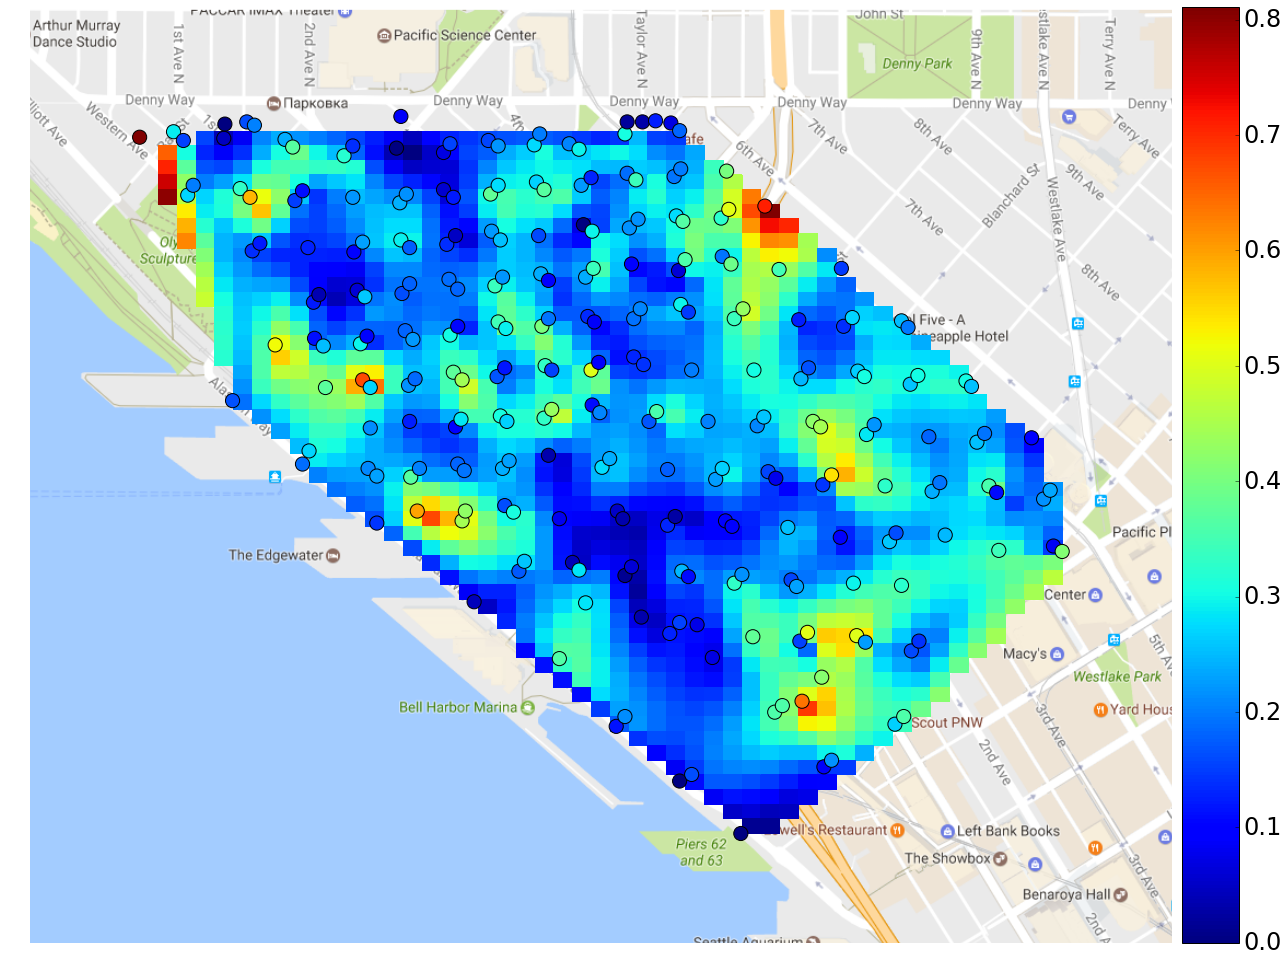

In [5]:
fig, ax = figure_functions.interpolation(loads=avg_loads, gps_loc=gps_loc, time=time,
                                         N=N, fig_path=fig_path)
plt.show()

## Triangular Grid

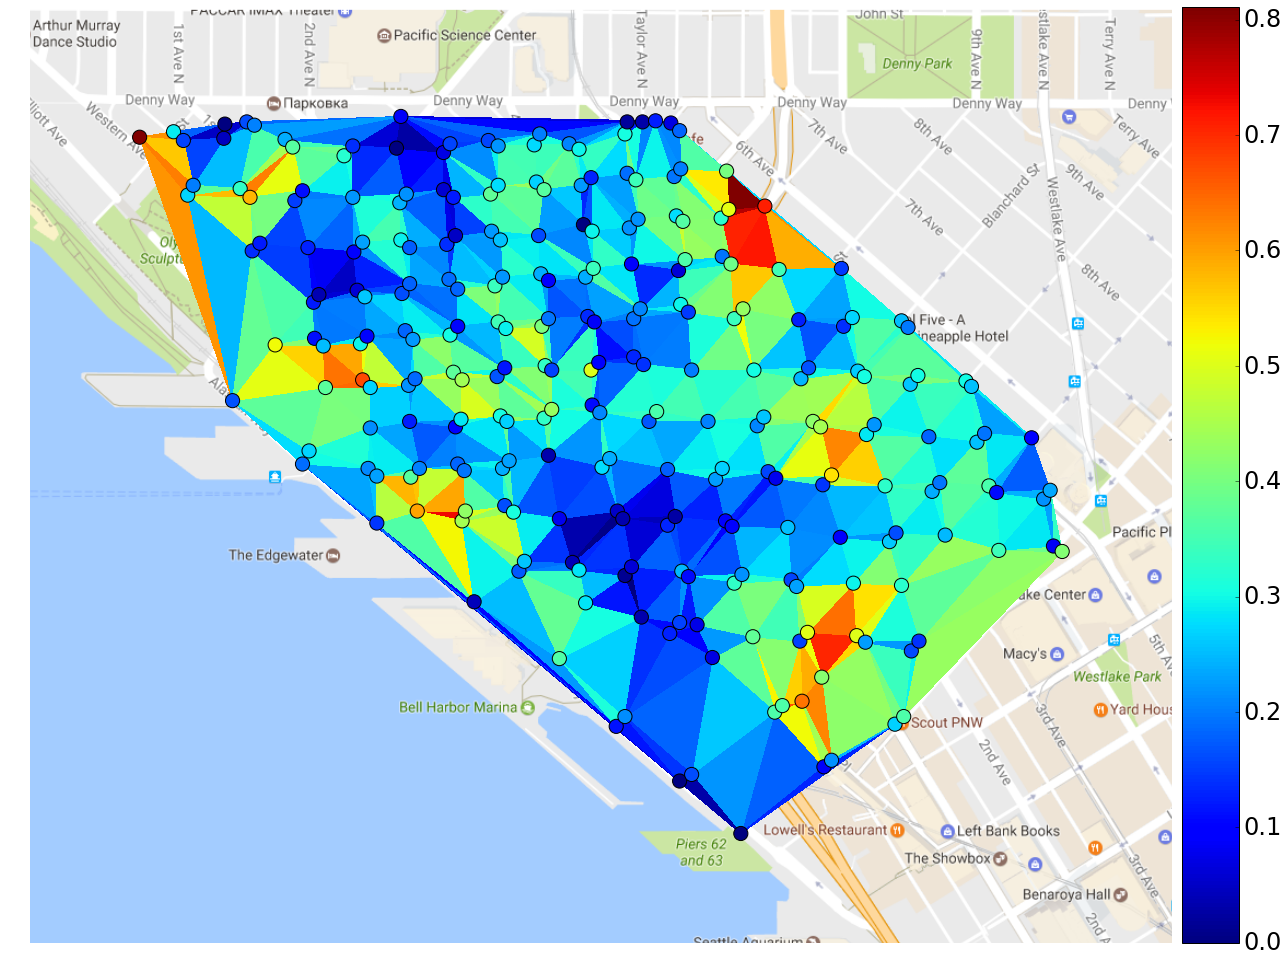

In [6]:
fig, ax = figure_functions.triangular_grid(loads=avg_loads, gps_loc=gps_loc, time=time,
                                           N=N, fig_path=fig_path)
plt.show()

## Contour Plot

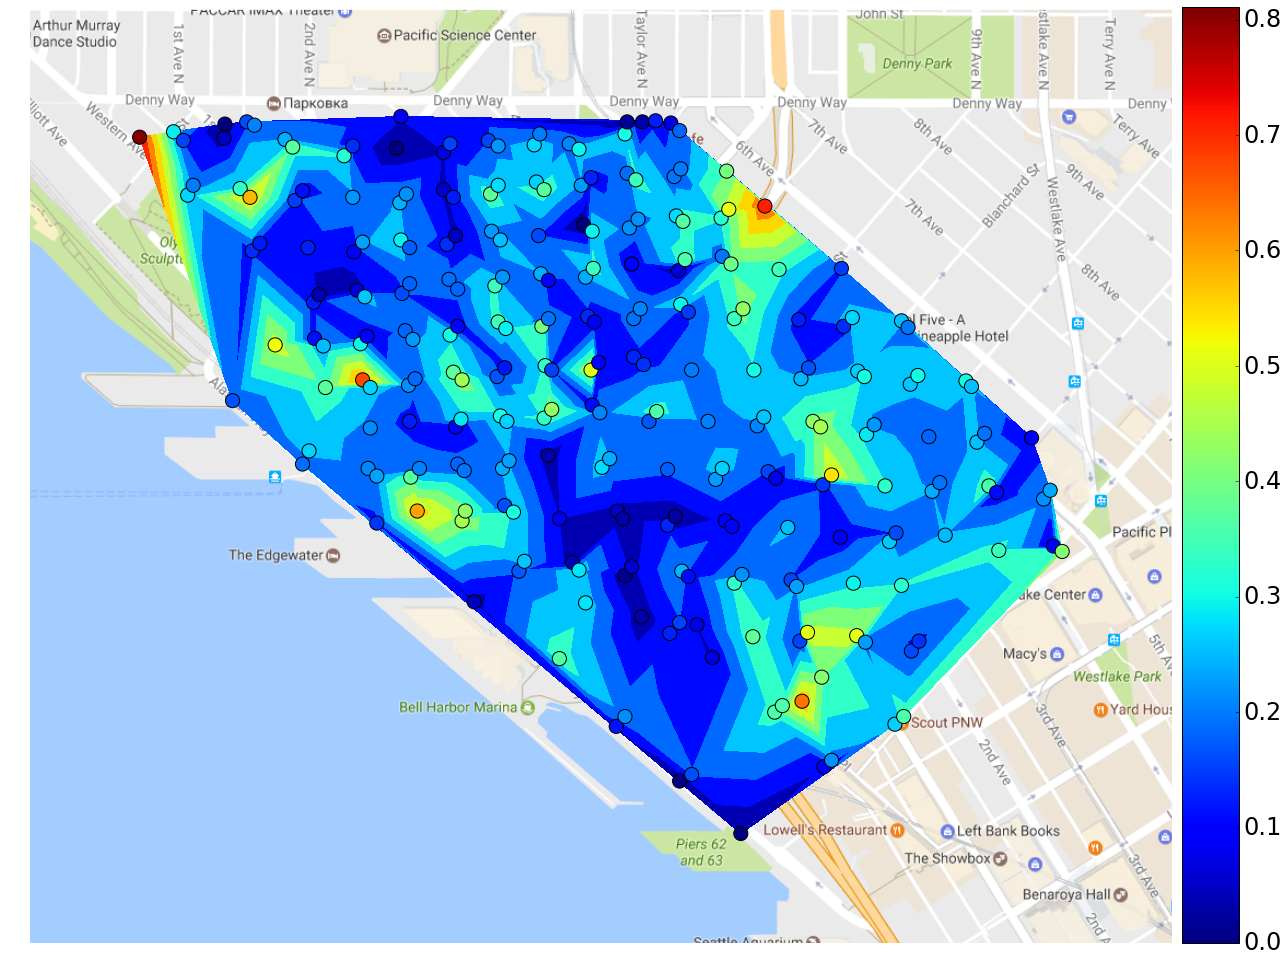

In [7]:
fig, ax = figure_functions.contour_plot(loads=avg_loads, gps_loc=gps_loc, time=time,
                                         N=N, fig_path=fig_path)
plt.show()

## Voronoi Diagram

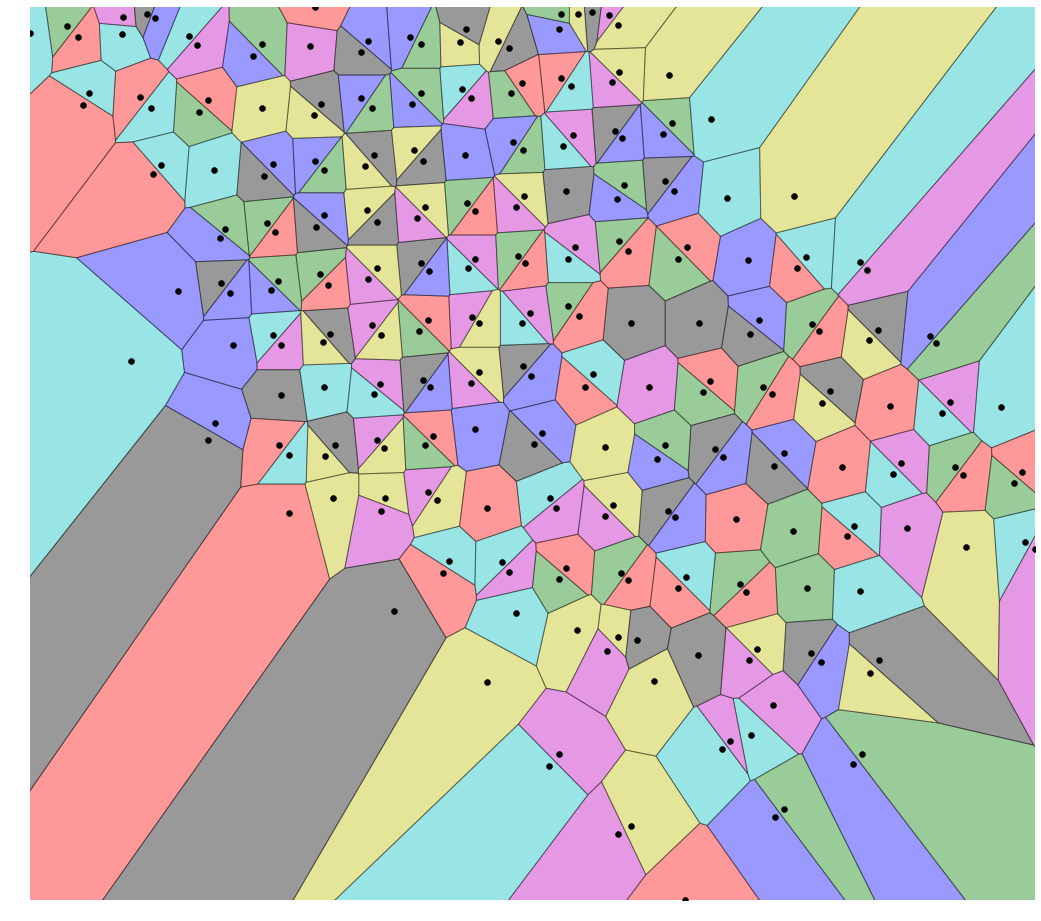

In [8]:
fig, ax = figure_functions.voronoi(gps_loc=gps_loc, N=N, fig_path=fig_path)
plt.show()

## Spatial Heterogeneity

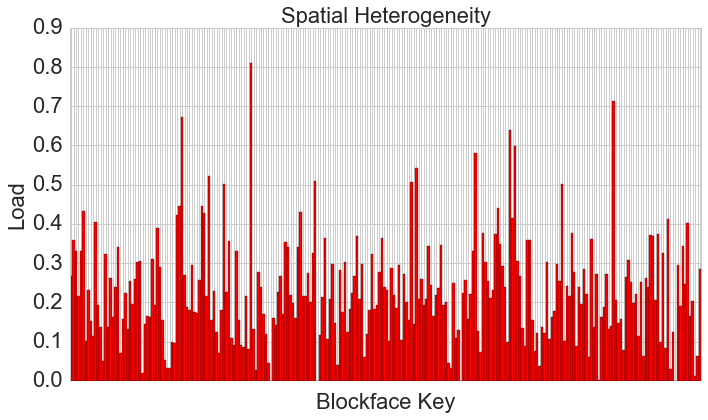

In [9]:
fig, ax = figure_functions.spatial_heterogeneity(loads=avg_loads, time=time, 
                                                N=N, fig_path=fig_path)
plt.show()

## Temporal Heterogeneity

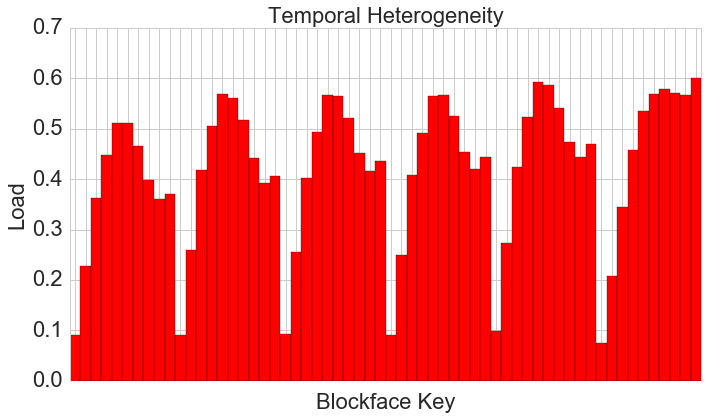

In [10]:
fig, ax = figure_functions.temporal_heterogeneity(loads=avg_loads, time=time, 
                                                P=P, fig_path=fig_path)
plt.show()

## Plot All

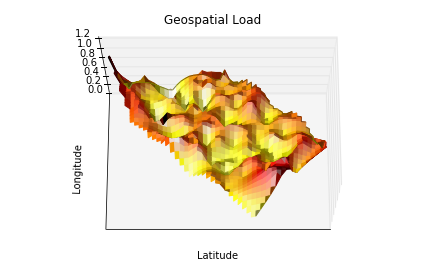

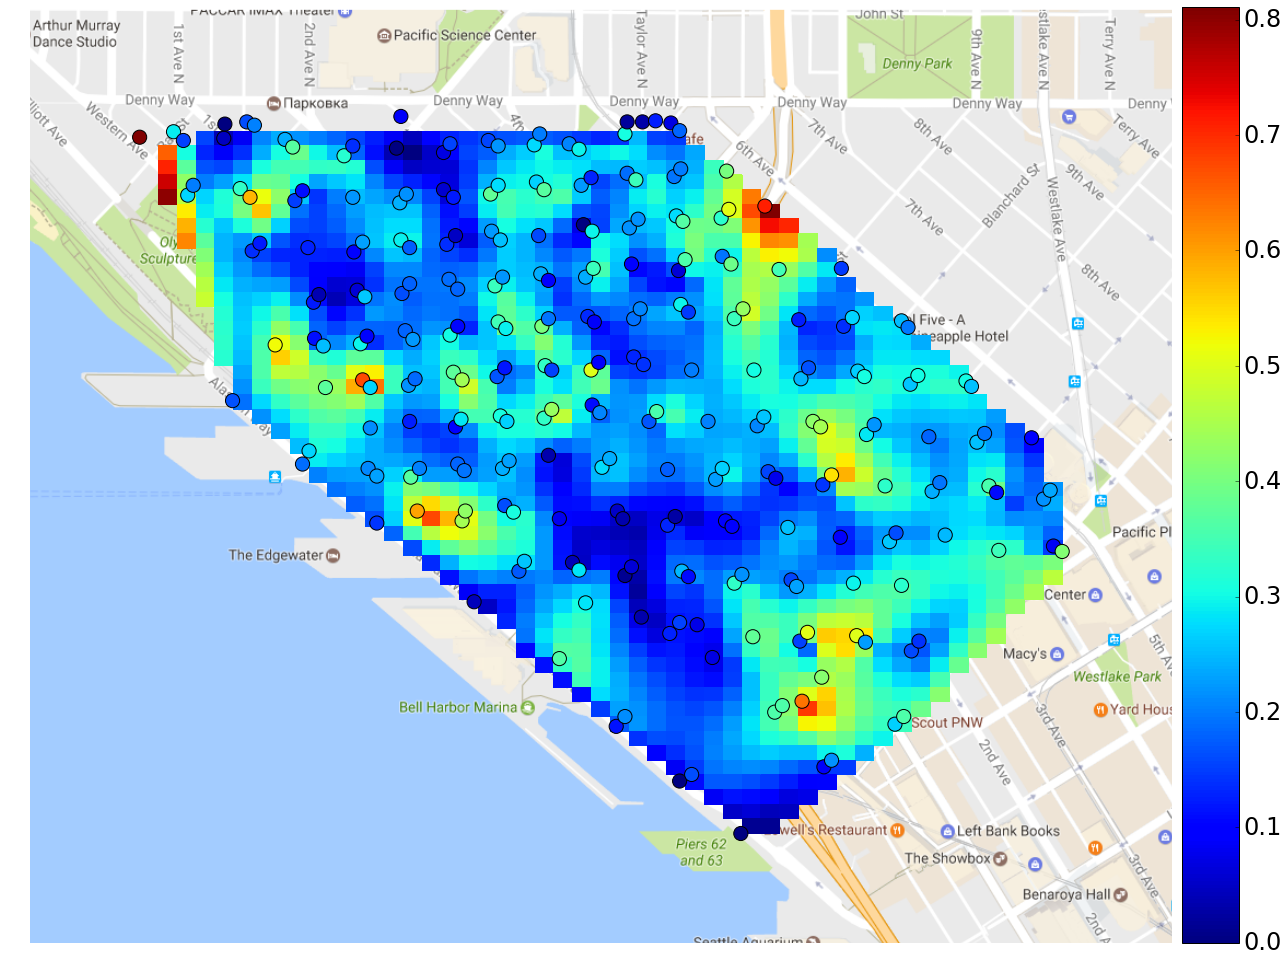

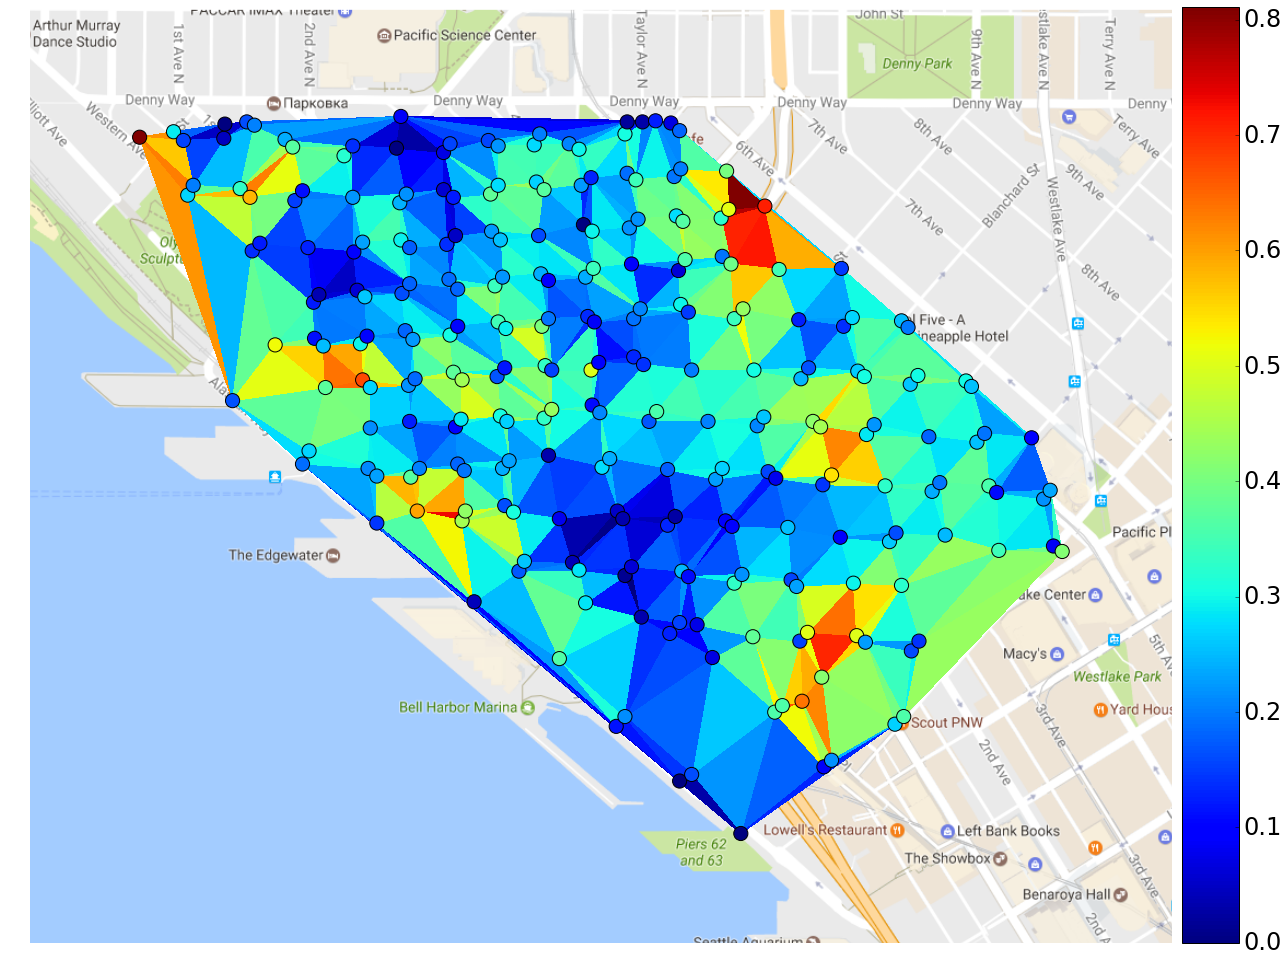

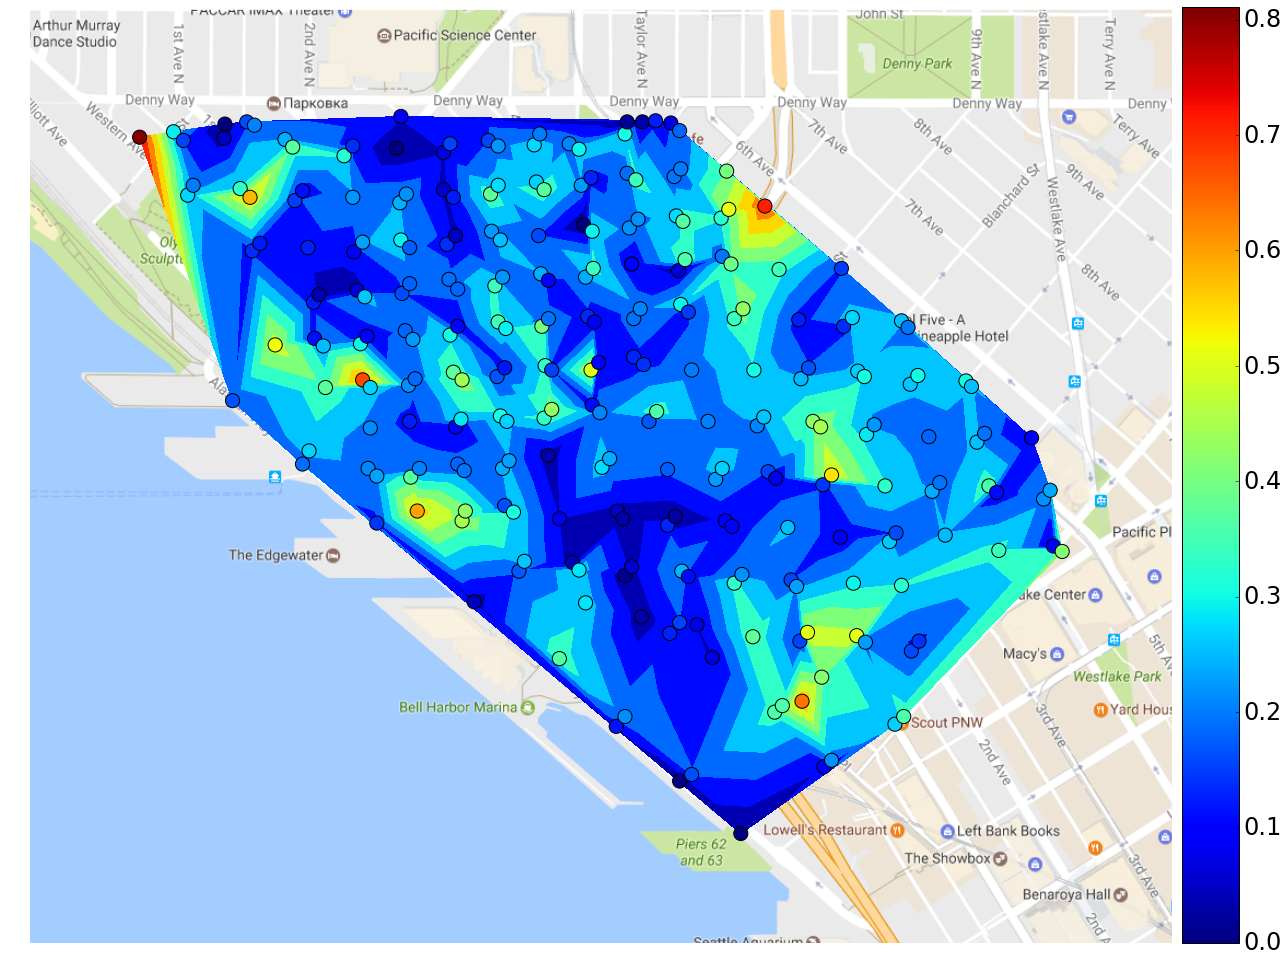

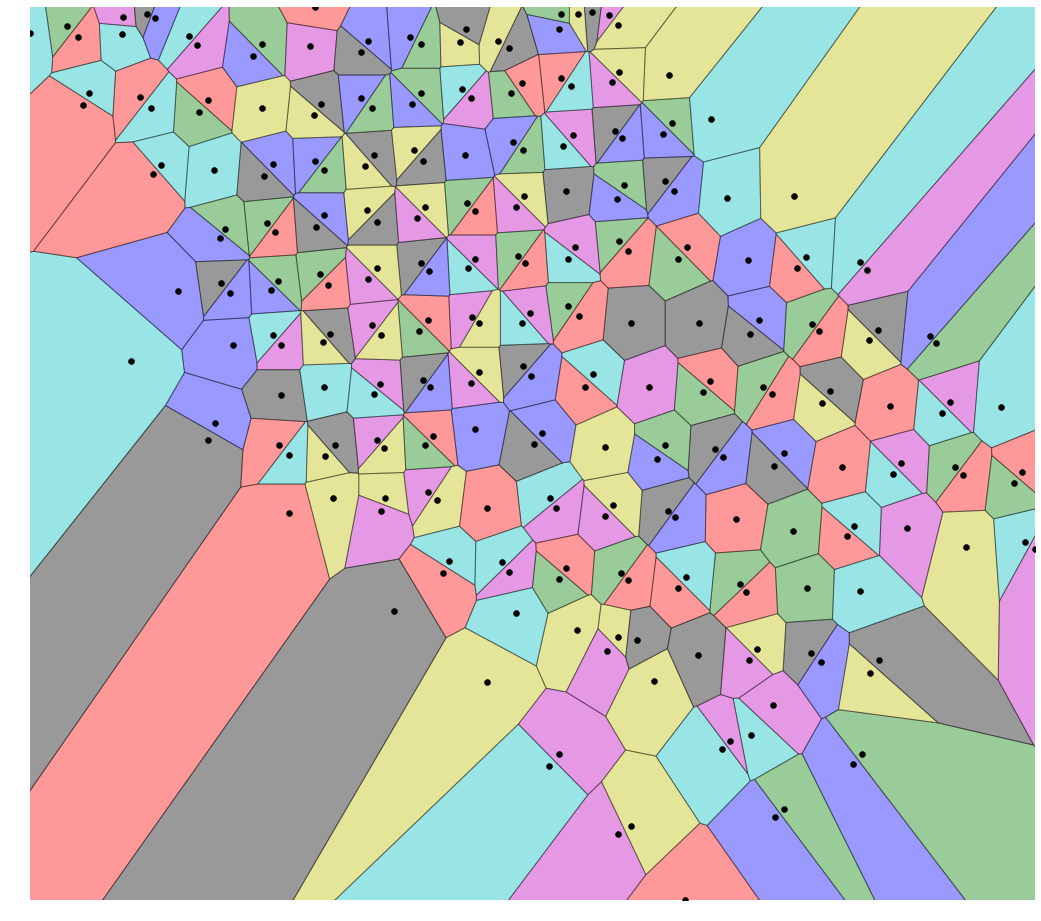

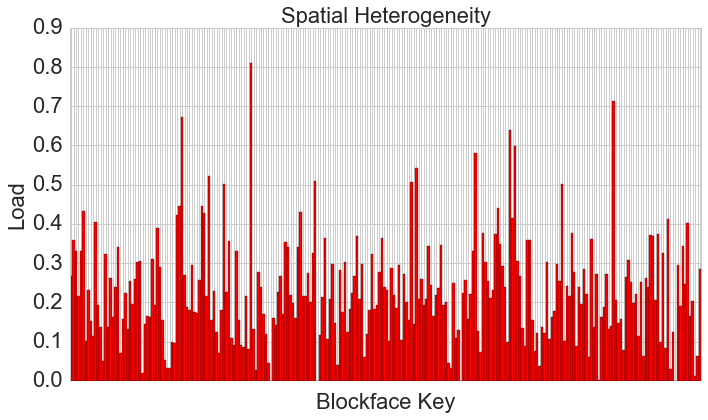

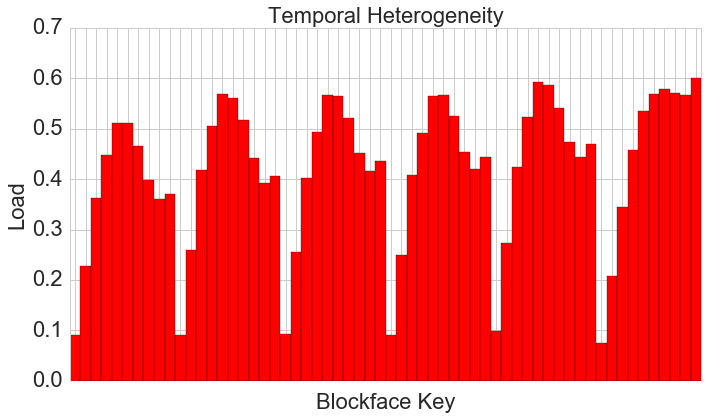

In [11]:
figure_functions.plot_all(loads=avg_loads, gps_loc=gps_loc, time=time, N=N, P=P, fig_path=fig_path)

In [106]:
week_begins = [i for i in range(0,70,10)]

days = []

for i in range(6):
    days.append([range(week_begins[i], week_begins[i+1])])

time_means = np.mean(avg_loads, axis=0)

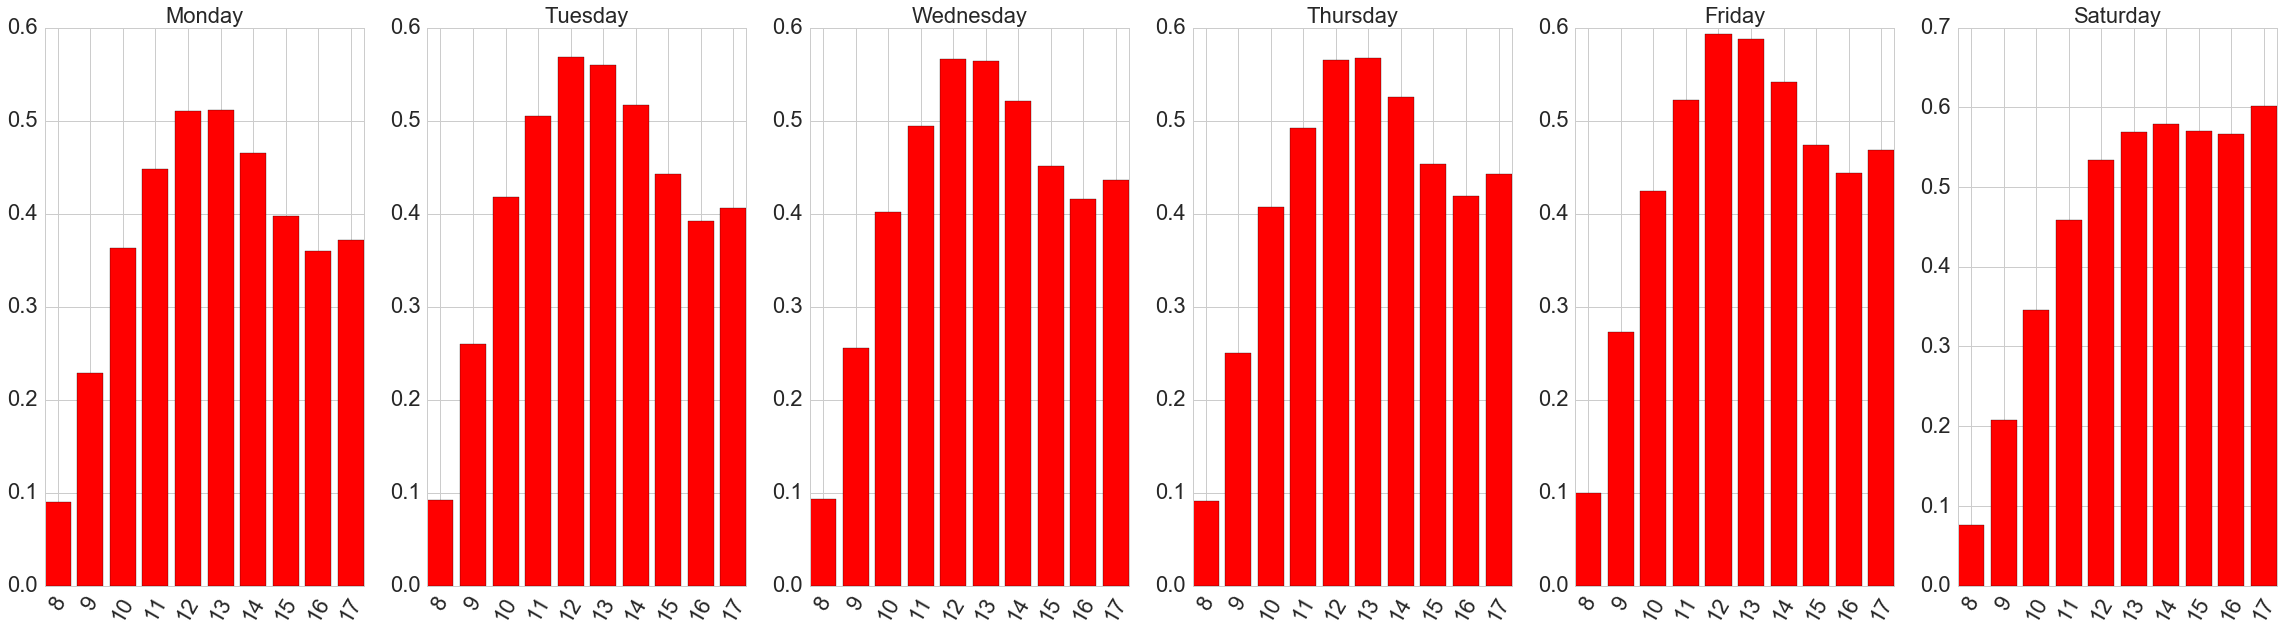

In [137]:
sns.set()
sns.set_style("whitegrid")

fig, ax = plt.subplots(nrows=1,ncols=6,figsize=(40,10))

day_dict = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
i = 1

for day in days:
    bins = range(8,10+8)
    counts = time_means[day]

    ax1 = plt.subplot(1,6,i)
    
    ax1.set_xticks(np.arange(min(bins), max(bins)+1, 1))
    
    plt.title(day_dict[i], fontsize=22)
    
    plt.setp(ax1.get_xticklabels(), fontsize=22, rotation=60)
    plt.setp(ax1.get_yticklabels(), fontsize=22)
    
    plt.bar(bins, counts, color='red', align='center')
    
    i += 1
    
plt.show()
sns.reset_orig()

In [117]:
week_begins = [i for i in range(0,60,10)]

hours = []
for i in range(10):
    hours.append([hour + i for hour in week_begins])

time_means = np.mean(avg_loads, axis=0)

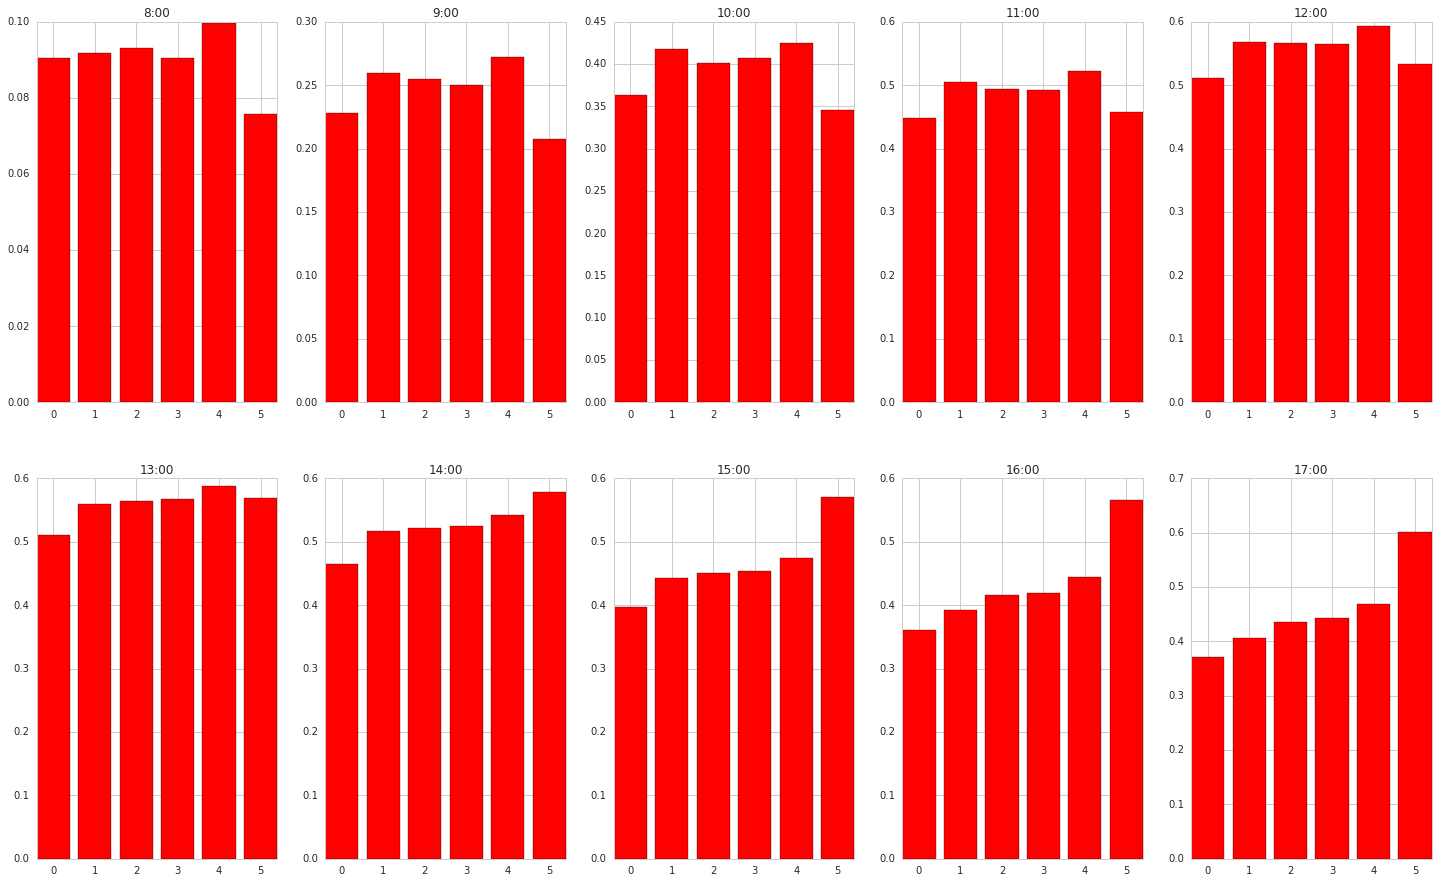

In [140]:
sns.set()
sns.set_style("whitegrid")

fig, ax = plt.subplots(nrows=2,ncols=5,figsize=(25,15))

i = 1
for hour in hours:
    bins = range(6)
    counts = time_means[hour]
    
    
    ax1 = plt.subplot(2,5,i)
    
    ax1.set_xticks(np.arange(min(bins), max(bins)+1, 1))
    ax1.title.set_text(str(7+i) + ':00')
    plt.bar(bins, counts, color='red', align='center')
    
    i += 1
    
plt.show()
sns.reset_orig()